In [49]:
import pandas as pd
import matplotlib
from datasets import load_dataset


from IPython.display import display


In [53]:
def preprocess_text_wmt14(examples):
    inputs = [ex["en"] for ex in examples["translation"]]
    targets = [ex["fr"] for ex in examples["translation"]]
    text_df = pd.DataFrame({'en':inputs, 'fr':targets})
    return text_df

def preprocess_text_flores200(dataset_src, dataset_tgt):    
    inputs = dataset_flores200_eng['sentence']
    targets = dataset_flores200_fra['sentence']
    text_df = pd.DataFrame({'en':inputs, 'fr':targets})
    return text_df


def num_of_words_in_lang_dataset(df, lang_code):
    df['word_count' + "_" + lang_code] = df[lang_code].apply(lambda x : len(str(x).split(" ")))
    return df


def describe_dataset_df(text_df):
    text_df = num_of_words_in_lang_dataset(text_df, 'en')
    text_df = num_of_words_in_lang_dataset(text_df, 'fr')
    display(text_df.head(10))
    display(text_df.describe())
    text_df.hist(bins = 100)
   
       

In [54]:
# Analyse WMT14  dataset
all_dataset_wmt14 = load_dataset("wmt14", "fr-en", split="validation")
all_dataset_wmt14

Found cached dataset wmt14 (/home/wassim/.cache/huggingface/datasets/wmt14/fr-en/1.0.0/2de185b074515e97618524d69f5e27ee7545dcbed4aa9bc1a4235710ffca33f4)


Dataset({
    features: ['translation'],
    num_rows: 3000
})

,en,fr,word_count_en,word_count_fr
0,A Republican strategy to counter the re-electi...,Une stratégie républicaine pour contrer la réé...,9,8
1,Republican leaders justified their policy by t...,Les dirigeants républicains justifièrent leur ...,12,15
2,"However, the Brennan Centre considers this a m...","Or, le Centre Brennan considère cette dernière...",26,29
3,"Indeed, Republican lawyers identified only 300...","D'ailleurs, les avocats républicains n'ont rec...",17,17
4,One thing is certain: these new provisions wil...,Une chose est certaine: ces nouvelles disposit...,15,13
5,"In this sense, the measures will partially und...","En ce sens, ces mesures mineront en partie le ...",12,12
6,"Unlike in Canada, the American States are resp...","Contrairement au Canada, les États américains ...",18,15
7,It is in this spirit that a majority of Americ...,C'est dans cet esprit qu'une majorité de gouve...,25,26
8,This phenomenon gained momentum following the ...,Ce phénomène a pris de l'ampleur après les éle...,19,22
9,"As a result, 180 bills restricting the exercis...","En conséquence, 180 projets de lois restreigna...",21,23


,word_count_en,word_count_fr
count,3000.000000,3000.000000
mean,18.696000,20.517000
std,10.998268,12.309842
min,1.000000,1.000000
25%,11.000000,12.000000
50%,17.000000,18.000000
75%,24.000000,27.000000
max,82.000000,100.000000


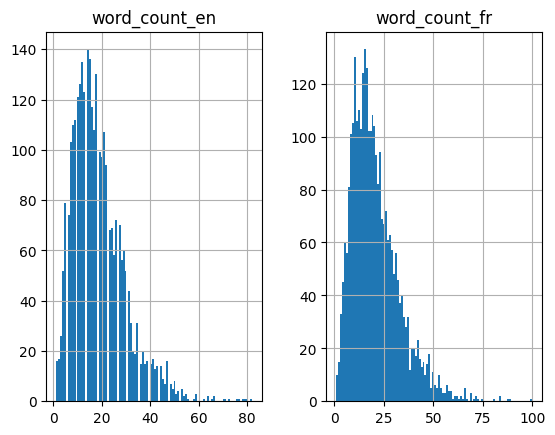

In [55]:
wmt14_df = preprocess_text_wmt14(all_dataset_wmt14)
describe_dataset_df(wmt14_df)

Found cached dataset flores (/home/wassim/.cache/huggingface/datasets/facebook___flores/fra_Latn/1.0.0/2a1174c8c4991ca09a9cb5b9a367cb2e049b073852cb4097456164d4612391ef)
Found cached dataset flores (/home/wassim/.cache/huggingface/datasets/facebook___flores/eng_Latn/1.0.0/2a1174c8c4991ca09a9cb5b9a367cb2e049b073852cb4097456164d4612391ef)


,en,fr,word_count_en,word_count_fr
0,"On Monday, scientists from the Stanford Univer...",Des scientifiques de l’école de médecine de l’...,43,59
1,Lead researchers say this may bring early dete...,"Selon les chercheurs principaux, cela pourrait...",36,53
2,The JAS 39C Gripen crashed onto a runway at ar...,Le JAS 39C Gripen s’est écrasé sur une piste a...,24,26
3,The pilot was identified as Squadron Leader Di...,Le pilote a été identifié comme étant le chef ...,9,12
4,Local media reports an airport fire vehicle ro...,La presse locale a rapporté qu'un véhicule de ...,11,20
5,28-year-old Vidal had joined Barça three seaso...,"Vidal, 28 ans, avait rejoint le Barça il y a t...",10,16
6,"Since moving to the Catalan-capital, Vidal had...","Depuis son arrivée dans la capitale catalane, ...",13,15
7,The protest started around 11:00 local time (U...,La manifestation a commencé vers 11 h heure lo...,22,29
8,"Just after 11:00, protesters blocked traffic o...","À Whitehall, peu après 11 h 00, des manifestan...",12,19
9,"At 11:20, the police asked the protesters to m...","À 11 h 20, la police a demandé aux manifestant...",29,29


,word_count_en,word_count_fr
count,997.000000,997.000000
mean,21.018054,23.960883
std,6.844051,8.086845
min,6.000000,5.000000
25%,16.000000,18.000000
50%,20.000000,23.000000
75%,25.000000,29.000000
max,48.000000,59.000000


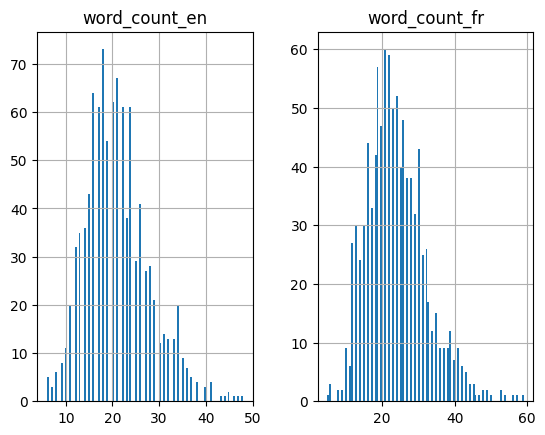

In [56]:
dataset_flores200_fra = load_dataset("facebook/flores", "fra_Latn", split="dev")
dataset_flores200_eng = load_dataset("facebook/flores", "eng_Latn", split="dev")

flores200_df = preprocess_text_flores200(dataset_flores200_eng, dataset_flores200_fra)
describe_dataset_df(flores200_df)


In [5]:
CSV_metrics_folder = "~/Archer/tests/metric_logs_temp/"

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
data = pd.read_csv(CSV_metrics_folder + "t5-large_wmt14_metrics.csv")
data = data.sort_values(by=['sacrebleu'], ascending=False)

data

,Unnamed: 0,sacrebleu,spBleu,chrf,chrfpp,gen_len,model_name,dataset_name,beam_size,batch_size,max_length,max_source_length,src_lang,tgt_lang
8,0,32.878556,38.882182,58.763930,56.420142,39.982000,t5-large,wmt14,4,32,128,1024,en,fr
11,0,32.789237,38.780329,58.650936,56.311633,39.982000,t5-large,wmt14,4,32,256,1024,en,fr
14,0,32.789237,38.780329,58.650936,56.311633,39.982000,t5-large,wmt14,4,32,512,1024,en,fr
7,0,32.719604,38.663914,58.646761,56.317278,39.766333,t5-large,wmt14,2,32,128,1024,en,fr
10,0,32.630036,38.561487,58.532783,56.207516,39.766333,t5-large,wmt14,2,32,256,1024,en,fr
13,0,32.630036,38.561487,58.532783,56.207516,39.766333,t5-large,wmt14,2,32,512,1024,en,fr
5,0,32.506512,38.302201,58.172332,55.817250,37.195000,t5-large,wmt14,4,32,64,1024,en,fr
4,0,32.284090,38.132538,58.046057,55.697077,37.030000,t5-large,wmt14,2,32,64,1024,en,fr
6,0,32.166785,37.954126,58.226790,55.892574,39.319000,t5-large,wmt14,1,32,128,1024,en,fr
9,0,32.085684,37.857408,58.115874,55.788274,39.319000,t5-large,wmt14,1,32,256,1024,en,fr


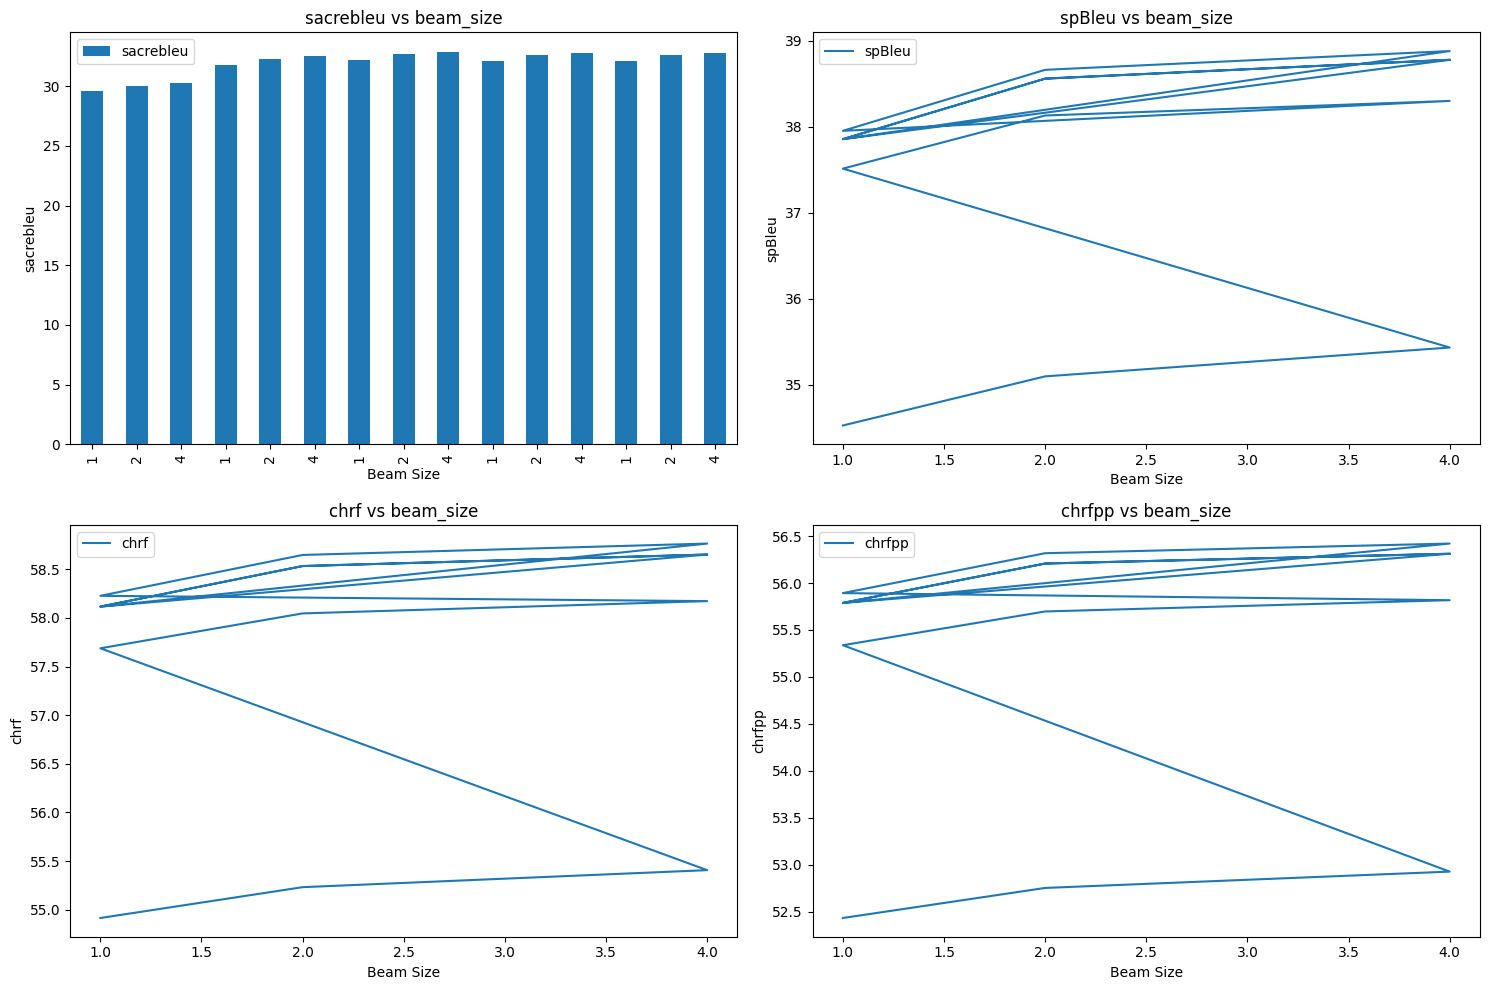

Metric: sacrebleu
Mean: 31.95
Standard Deviation: 1.09

Metric: spBleu
Mean: 37.66
Standard Deviation: 1.43

Metric: chrf
Mean: 57.71
Standard Deviation: 1.34

Metric: chrfpp
Mean: 55.35
Standard Deviation: 1.40



In [7]:


# Create subplots for different metrics
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot 1: sacrebleu vs beam_size
data.plot(x='beam_size', y='sacrebleu', kind='bar', ax=axes[0, 0], title='sacrebleu vs beam_size')
axes[0, 0].set_xlabel('Beam Size')
axes[0, 0].set_ylabel('sacrebleu')

# Plot 2: spBleu vs beam_size
data.plot(x='beam_size', y='spBleu', kind='line', ax=axes[0, 1], title='spBleu vs beam_size')
axes[0, 1].set_xlabel('Beam Size')
axes[0, 1].set_ylabel('spBleu')

# Plot 3: chrf vs beam_size
data.plot(x='beam_size', y='chrf', kind='line', ax=axes[1, 0], title='chrf vs beam_size')
axes[1, 0].set_xlabel('Beam Size')
axes[1, 0].set_ylabel('chrf')

# Plot 4: chrfpp vs beam_size
data.plot(x='beam_size', y='chrfpp', kind='line', ax=axes[1, 1], title='chrfpp vs beam_size')
axes[1, 1].set_xlabel('Beam Size')
axes[1, 1].set_ylabel('chrfpp')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Calculate mean and standard deviation of each metric
metrics = ['sacrebleu', 'spBleu', 'chrf', 'chrfpp']
for metric in metrics:
    mean = data[metric].mean()
    std = data[metric].std()
    print(f"Metric: {metric}\nMean: {mean:.2f}\nStandard Deviation: {std:.2f}\n")

In [9]:
# Find the row with the highest value for each metric
best_hyperparameters = {}
for metric in metrics:
    best_row = data[data[metric] == data[metric].max()]  # Assumes higher value is better
    best_hyperparameters[metric] = best_row.iloc[0]

# Display the best hyperparameters for each metric
for metric, best_row in best_hyperparameters.items():
    print(f"Best hyperparameters for {metric}:")
    print(best_row)
    print("\n")

Best hyperparameters for sacrebleu:
Unnamed: 0                   0
sacrebleu            32.878556
spBleu               38.882182
chrf                  58.76393
chrfpp               56.420142
gen_len                 39.982
model_name            t5-large
dataset_name             wmt14
beam_size                    4
batch_size                  32
max_length                 128
max_source_length         1024
src_lang                    en
tgt_lang                    fr
Name: 8, dtype: object


Best hyperparameters for spBleu:
Unnamed: 0                   0
sacrebleu            32.878556
spBleu               38.882182
chrf                  58.76393
chrfpp               56.420142
gen_len                 39.982
model_name            t5-large
dataset_name             wmt14
beam_size                    4
batch_size                  32
max_length                 128
max_source_length         1024
src_lang                    en
tgt_lang                    fr
Name: 8, dtype: object


Best hyperpar